# True Beacon Quant Research Project 
#### Khade Abhi Machhindra
#### 20AG35006


## Step 1: Import of Libraries and Loading/Understanding the dataset


In [16]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
import seaborn as sns
import datetime as dt
from hurst import compute_Hc
from pykalman import KalmanFilter

In [17]:
data = pd.read_parquet('data.parquet')
data[34680:40000]

,banknifty,nifty,tte
time,,,
2021-01-25 11:15:00,0.314711,0.217428,3
2021-01-25 11:16:00,0.299715,0.216726,3
2021-01-25 11:17:00,0.303616,0.226937,31
2021-01-25 11:18:00,0.304524,0.227191,31
2021-01-25 11:19:00,0.305225,0.226700,31
2021-01-25 11:20:00,0.305569,0.226908,31
2021-01-25 11:21:00,0.308644,0.226889,31
2021-01-25 11:22:00,0.308447,0.226699,31
2021-01-25 11:23:00,0.317109,0.225979,31


In [18]:
data['banknifty'].isna().sum() + data['nifty'].isna().sum() + data['tte'].isna().sum()

3500

In [19]:
data.size

2071536

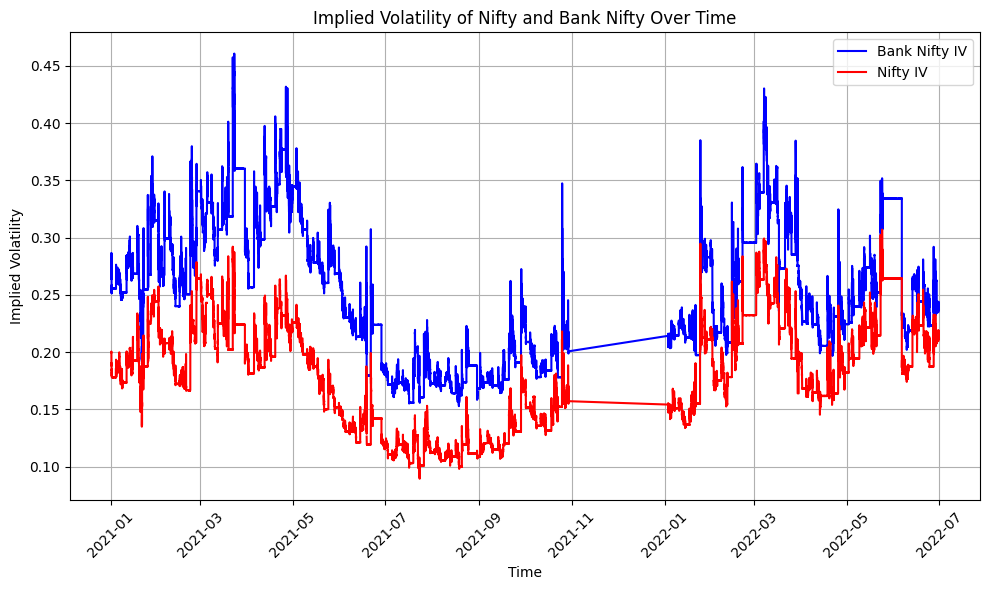

0.89627410849184

In [20]:
df = data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["banknifty"], label='Bank Nifty IV', color='blue')
plt.plot(df.index, df["nifty"], label='Nifty IV', color='red')
plt.title('Implied Volatility of Nifty and Bank Nifty Over Time')
plt.xlabel('Time')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
correlation = df[["banknifty", "nifty"]].corr().iloc[0, 1]
correlation

## Step 2: Data Preprocessing
Data anomalies exist post market closing hours (post 15:30:00) and on weekends(2021-01-02), we need to clean the dataset. Specifically, we'll focus on:

1. #### Removing Entries Post Market Close:
As the Indian equity market (NSE) operates from 9:15 AM to 3:30 PM, any entries beyond 3:30 PM will be considered non-trading hours data and should be removed.

2. #### Filtering Out Weekend Data:
Since Saturday and Sunday are non-trading days, we'll remove entries for these days.

3. #### Filling the na values in the dataset:
The missing values are filled with the values of the previous row. We can use the

4. #### Correcting the wrong TTE values in the dataset:
The incorrect TTE values are replaced with the correct values.


In [21]:
data.index = pd.to_datetime(data.index)

# Step 1: Remove entries post 3:30 PM
data = data.between_time('09:15', '15:30')

# Step 2: Remove weekend data
# 'data.index.weekday' returns the day of the week as an integer, where Monday=0, Sunday=6
data = data[data.index.weekday < 5] 

# Step 3: Fill na
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        data[column] = data[column].ffill()

# Step 4: Correcting the wrong TTE values in the dataset by assigning mode:
data.index = pd.to_datetime(data.index)
mode_tte = data.groupby(data.index.date)['tte'].transform(lambda x: x.mode()[0])
data['tte'] = mode_tte

data.to_csv('data.csv')


In [22]:
data[6135:7000]

,banknifty,nifty,tte
time,,,
2021-01-25 11:14:00,0.314721,0.217724,31
2021-01-25 11:15:00,0.314711,0.217428,31
2021-01-25 11:16:00,0.299715,0.216726,31
2021-01-25 11:17:00,0.303616,0.226937,31
2021-01-25 11:18:00,0.304524,0.227191,31
2021-01-25 11:19:00,0.305225,0.226700,31
2021-01-25 11:20:00,0.305569,0.226908,31
2021-01-25 11:21:00,0.308644,0.226889,31
2021-01-25 11:22:00,0.308447,0.226699,31


In [23]:
df= pd.read_csv("data.csv")
df['banknifty'].isna().sum() + data['nifty'].isna().sum() + data['tte'].isna().sum()

0

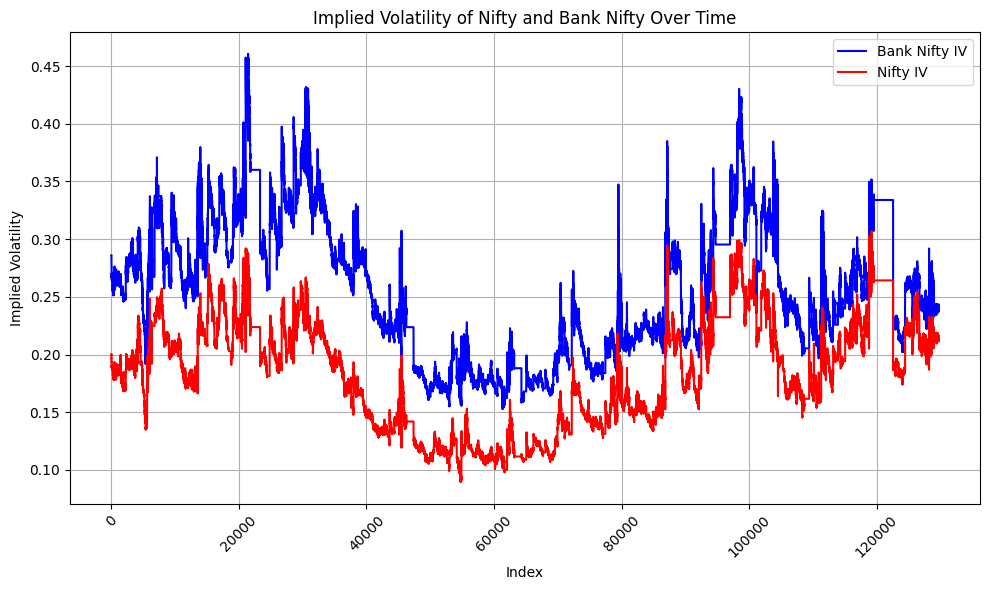

0.8962796946137879

In [24]:
# Plotting

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["banknifty"], label='Bank Nifty IV', color='blue')
plt.plot(df.index, df["nifty"], label='Nifty IV', color='red')
plt.title('Implied Volatility of Nifty and Bank Nifty Over Time')
plt.xlabel('Index')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Calculating and displaying correlation
correlation = df[["banknifty", "nifty"]].corr().iloc[0, 1]
correlation

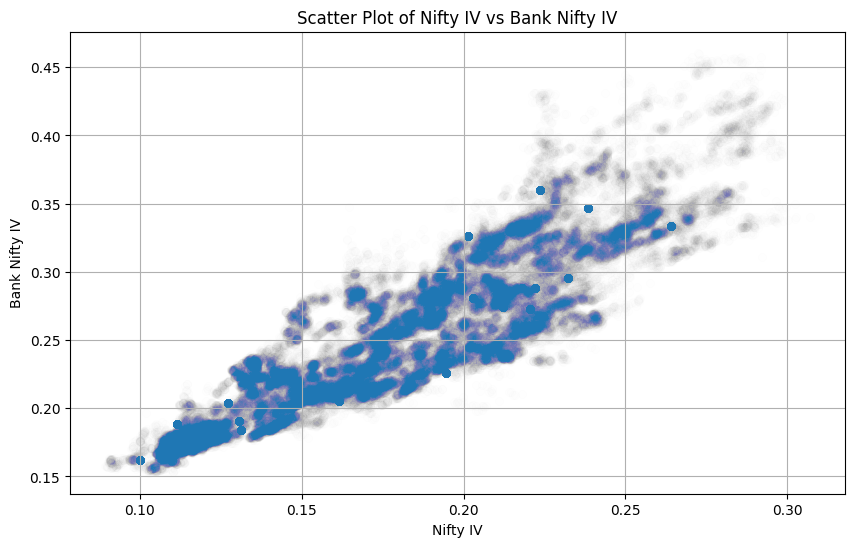

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['nifty'], df['banknifty'], alpha=0.005)
plt.title('Scatter Plot of Nifty IV vs Bank Nifty IV')
plt.xlabel('Nifty IV')
plt.ylabel('Bank Nifty IV')
plt.grid(True)
plt.show()

##  Step 3: Z Score MODEL


Backtesting Logic: The run_backtest method iterates through each time point in the data set, applying the trading logic based on Z-score thresholds:

Entry Logic: A trade is initiated (either long or short) when the Z-score crosses predefined upper or lower thresholds. A long position is taken when the Z-score falls below the lower threshold, indicating the spread is unusually low and expected to revert to the mean. Conversely, a short position is initiated when the Z-score exceeds the upper threshold, suggesting the spread is unusually high.

Exit Logic: The position is closed based on two conditions: The Z-score crosses back over more moderate thresholds (pos_threshold for short positions, neg_threshold for long positions), suggesting a partial reversion to the mean.

A maximum duration of holding (defined by 'bars') is reached, after which the trade is exited regardless of the Z-score, to limit exposure.


In [26]:
import pandas as pd
import numpy as np

class Long_Short_Backtester():
    def __init__(self, filepath30m,tc = 0, upper_threshold = 2, pos_threshold= 1.4, neg_threshold= -1.3, lower_threshold = -1.8,bars =30,window = 200):
        self.filepath30m = filepath30m
        self.window = window
        self.tc = tc
        self.bars = bars
        self.upper_threshold = upper_threshold
        self.pos_threshold= pos_threshold
        self.neg_threshold = neg_threshold
        self.lower_threshold = lower_threshold
        self.lower_threshold = lower_threshold
        self.tradebook = pd.DataFrame(columns=["long/short","entry_spread","exit_spread","entry_zscore","exit_zscore","entry", "exit", "entrytime", "exittime", "bars","signal"])
        self.get_data()
        
    def __repr__(self):
        return "Long_Short_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        raw = pd.read_csv(self.filepath30m, parse_dates=["time"])
        self.data30m = raw

    def test_strategy(self):
        df = self.data30m
        df['iv_spread'] = (df['banknifty'] - df['nifty'])
        rolling_mean = df['iv_spread'].rolling(window=self.window).mean()
        rolling_std = df['iv_spread'].rolling(window=self.window).std()
        df['z_score'] = (df['iv_spread'] - rolling_mean) / rolling_std # Default no position
        self.run_backtest()
    
    def run_backtest(self):
        last_index = self.data30m.index[-1]
        tradenumber = 1
        limitordertime = self.data30m.index[0]
        outtrade = True
        bars_since_entry=0
        limitorder =False
        intrade =False
        exittrade=False
        date = 4000

        while(date < last_index):
          
            if(outtrade):
                zscore = self.data30m['z_score'][date]
                short_cond = zscore > upper_threshold
                long_cond = zscore < lower_threshold
      
                if long_cond or short_cond:
                    outtrade = False
                    intrade = True  
                    entry_pnl = self.data30m['iv_spread'][date]*self.data30m['tte'][date]**0.7
                    if long_cond:
                        self.tradebook.loc[tradenumber] = ["long",self.data30m['iv_spread'][date],0,zscore,0,entry_pnl,0,self.data30m['time'][date],0,0,1]
                    elif short_cond:
                        self.tradebook.loc[tradenumber] = ["short",self.data30m['iv_spread'][date],0,zscore,0,entry_pnl,0,self.data30m['time'][date],0,0,-1]
                    bars_since_entry = -1    
            date = date + 1

            if(intrade):
                bars_since_entry = bars_since_entry + 1   

                cmp = self.data30m['z_score'][date]
                if(self.tradebook.loc[tradenumber, 'long/short']=="long"):
                        exit = cmp > neg_threshold
                elif(self.tradebook.loc[tradenumber, 'long/short']=="short"):
                        exit = cmp < pos_threshold
               
                if(bars_since_entry>=self.bars and exit):
                    exit_pnl = self.data30m['iv_spread'][date]*self.data30m['tte'][date]**0.7
                    self.tradebook.loc[tradenumber,'exit'] = exit_pnl
                    self.tradebook.loc[tradenumber,'exit_zscore'] = cmp
                    self.tradebook.loc[tradenumber,'exit_spread'] = self.data30m['iv_spread'][date]
                    self.tradebook.loc[tradenumber,'exittime'] = self.data30m['time'][date]
                    self.tradebook.loc[tradenumber,'bars'] = bars_since_entry
                    outtrade = True
                    intrade = False
                    date = date + 1
                    tradenumber = tradenumber + 1
                    
        df = self.tradebook
        pnl = []
        commision = []
        for i in df.index:
            a = df['exit'][i]-df['entry'][i]
            if(df['long/short'][i]=='short'):
                a = -a
            if(df['exit'][i]==0):
                a=0
            a = a 
            pnl.append(a)
            c = 0
            commision.append(c)
        df['commision']=commision
        df['pnl']=pnl
        df['actualpnl'] = df['pnl'] - df['commision']
        df['cumpnl']=df['actualpnl'].cumsum()
        df['returns'] = 1 + (df['actualpnl']/df['entry'])
        df['im'] = df.returns.cumprod().round(4)
        

def calculate(df):

    df['returns'] = 1 + (df['actualpnl'] / df['entry'])
    df['im'] = df['returns'].cumprod()
    trades_df = df
    trades_df['Peak'] = trades_df['cumpnl'].cummax()
    trades_df['Drawdown'] = (trades_df['Peak'] - trades_df['cumpnl']) / trades_df['Peak']
    max_drawdown = trades_df['Drawdown'].max()
    risk_free = 0.05
    num_profitable_trades = len(trades_df[trades_df['returns'] > 1])
    total_trades = len(trades_df)
    percentage_profitability = (num_profitable_trades / total_trades) * 100

    returns = (trades_df['pnl'])
    sharpe_ratio = ((np.mean(returns) - risk_free) / returns.std())
    multi = np.sqrt(252)
    sharpe_ratio *= multi
    total_returns_percentage = (trades_df['returns'].prod() - 1) * 100
    trade_per_day = total_trades / 363
    average_holding_duration = df["bars"].mean()

    avg_pnl = df['pnl'].mean()
    net_pnl = df['pnl'].sum()
    print("Performance Summary:")

    print("Total trades: {:.2f}".format(total_trades))
    print("Net Pnl: {:.2f}".format(net_pnl))
    print("Average PnL per trade: {:.4f}".format(avg_pnl))
    print("Percentage Profitability: {:.2f}%".format(percentage_profitability))
    print("Max Drawdown: {:.2%}".format(max_drawdown))
    print("Sharpe Ratio: {:.4f}".format(sharpe_ratio))
    print("Average Holding Duration per Trade: {:.2f} mins".format(average_holding_duration))
    print("Trade per day: {:.2f}".format(trade_per_day))
    plt.plot(df['cumpnl'])
    plt.xlabel("Number of Trades")
    plt.ylabel("Cumulative Pnl")

    


In [27]:
%%time
filepath30m = "data.csv"
tc = 0 # WILL BE CALCULATED 2X ie once for entry once for exit
upper_threshold = 1
pos_threshold= 0.5
neg_threshold= -0.5
lower_threshold = -1
bars = 40
window = 4000
tester = Long_Short_Backtester(filepath30m = filepath30m, tc = tc,upper_threshold = upper_threshold,pos_threshold=pos_threshold,neg_threshold=neg_threshold,lower_threshold=lower_threshold,bars = bars,window=window)

tester.test_strategy()
df=tester.tradebook
pd.set_option('display.max_rows', None)
df
        

C:\Users\amank\AppData\Local\Temp\ipykernel_17460\1416324697.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4097406109796401' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.tradebook.loc[tradenumber,'exit'] = exit_pnl
C:\Users\amank\AppData\Local\Temp\ipykernel_17460\1416324697.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.08095143037950793' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.tradebook.loc[tradenumber,'exit_zscore'] = cmp
C:\Users\amank\AppData\Local\Temp\ipykernel_17460\1416324697.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.081754' has dtype incompatible with int64, please explicitly cast to a compatible dtyp

CPU times: total: 2.03 s
Wall time: 2.39 s


,long/short,entry_spread,exit_spread,entry_zscore,exit_zscore,entry,exit,entrytime,exittime,bars,signal,commision,pnl,actualpnl,cumpnl,returns,im
1,long,0.074232,0.081754,-1.097183,0.080951,0.447045,0.409741,2021-01-15 13:15:00,2021-01-18 09:15:00,135,1,0,-0.037305,-0.037305,-0.037305,0.916553,9.166000e-01
2,long,0.073968,0.079569,-1.086017,-0.245536,0.370721,0.398790,2021-01-18 09:21:00,2021-01-18 11:17:00,115,1,0,0.028069,0.028069,-0.009236,1.075715,9.859000e-01
3,long,0.074191,0.079176,-1.050680,-0.313558,0.371836,0.396823,2021-01-18 11:30:00,2021-01-18 12:25:00,54,1,0,0.024987,0.024987,0.015751,1.067198,1.052200e+00
4,long,0.074750,0.080158,-1.003781,-0.175918,0.374637,0.401742,2021-01-18 14:48:00,2021-01-18 15:30:00,41,1,0,0.027104,0.027104,0.042855,1.072348,1.128300e+00
5,long,0.073162,0.083615,-1.234539,0.346258,0.340608,0.389275,2021-01-19 09:58:00,2021-01-19 10:39:00,40,1,0,0.048667,0.048667,0.091522,1.142882,1.289500e+00
6,long,0.074117,0.078210,-1.084340,-0.412901,0.345054,0.364110,2021-01-19 11:58:00,2021-01-19 14:37:00,158,1,0,0.019055,0.019055,0.110577,1.055223,1.360800e+00
7,long,0.072758,0.072454,-1.214251,-0.497534,0.338730,0.253963,2021-01-19 14:45:00,2021-01-22 09:36:00,818,1,0,-0.084766,-0.084766,0.025811,0.749752,1.020200e+00
8,long,0.065625,0.075938,-1.115383,-0.167927,0.230025,0.266175,2021-01-22 11:17:00,2021-01-22 11:58:00,40,1,0,0.036150,0.036150,0.061961,1.157158,1.180600e+00
9,short,0.090307,0.081471,1.143666,0.322726,0.316539,0.285566,2021-01-22 13:44:00,2021-01-22 14:30:00,45,-1,0,0.030973,0.030973,0.092934,1.097850,1.296100e+00
10,short,0.089873,0.078294,1.087425,0.024304,0.315018,0.274434,2021-01-22 14:33:00,2021-01-22 15:14:00,40,-1,0,0.040584,0.040584,0.133518,1.128832,1.463100e+00


Performance Summary:
Total trades: 434.00
Net Pnl: 52.57
Average PnL per trade: 0.1211
Percentage Profitability: 90.09%
Max Drawdown: 76.66%
Sharpe Ratio: 5.5259
Average Holding Duration per Trade: 180.33 mins
Trade per day: 1.20


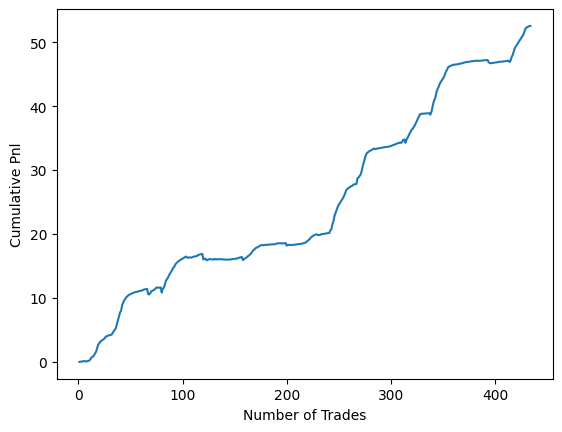

In [28]:
calculate(df)

##  Step 4: Better MODEL

Hypothesis: Bollinger Bands (sma/std of score) 
1. Adaptability to Volatility
2. Visual Trend Indicators
3. Overbought/Oversold Conditions
4. Complementary to Other Strategies
Visualization

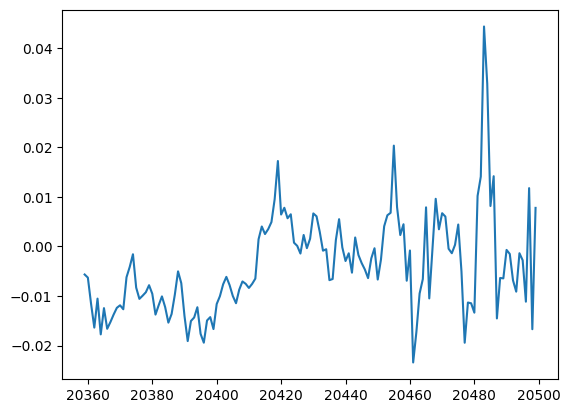

In [30]:
df= pd.read_csv("data.csv")
df['iv_spread'] =  df['banknifty']-df['nifty']
df = df[20300:20500]
window = 60
data = df
data['z_score'] = ((data['iv_spread'] - data['iv_spread'].rolling(window=window).mean()) / data['iv_spread'].rolling(window=window).std())/100
plt.plot(data['z_score'])

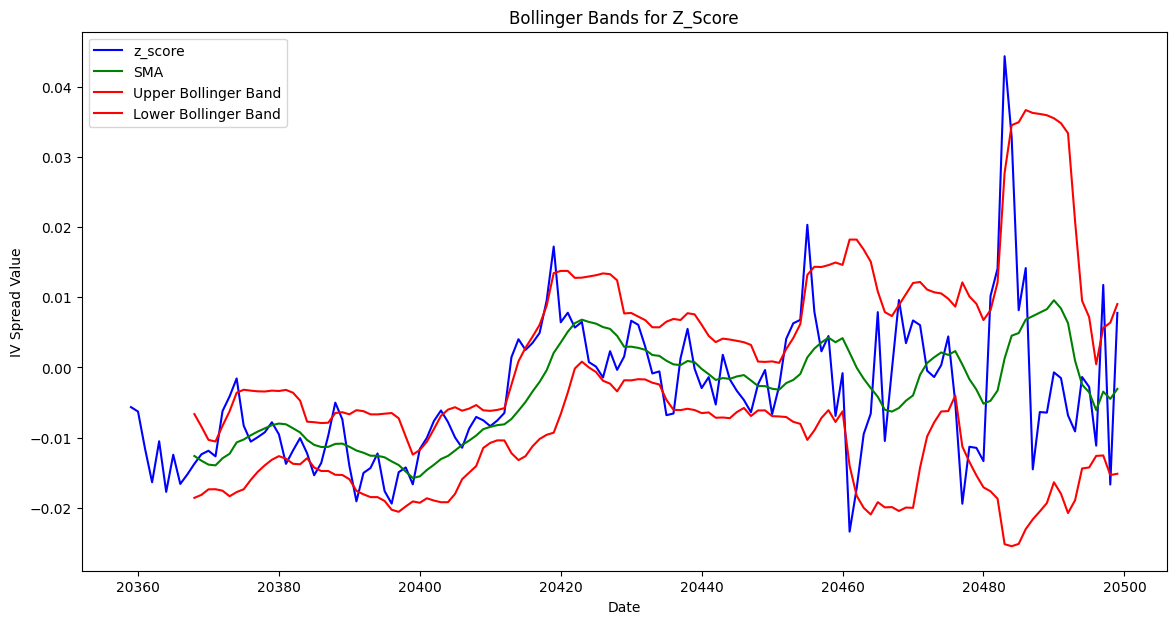

In [31]:

length = 10  # Length of the moving average
multKC = 1.5  # Multiplier for the standard deviation

# Calculate the SMA for 'iv_spread'
df['SMA'] = data['z_score'].rolling(window=length).mean()

# Calculate the standard deviation (STD) for 'iv_spread'
df['STD'] = data['z_score'].rolling(window=length).std(ddof=0)

# Calculate the Upper and Lower Bollinger Bands for 'iv_spread'
df['UpperBB'] = df['SMA'] + (multKC * df['STD'])
df['LowerBB'] = df['SMA'] - (multKC * df['STD'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, data['z_score'], label='z_score', color='blue')
plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['UpperBB'], label='Upper Bollinger Band', color='red')
plt.plot(df.index, df['LowerBB'], label='Lower Bollinger Band', color='red')
# plt.plot(data['z_score'], label='zscore', color='black')

# plt.fill_between(df.index, df['LowerBB'], df['UpperBB'], color='gray', alpha=0.1)
plt.title('Bollinger Bands for Z_Score')
plt.xlabel('Date')
plt.ylabel('IV Spread Value')
plt.legend()
plt.show()

##  Step 5:  Bollinger Bands Mean reversal of Z Score MODEL

Entry Logic

The strategy looks for specific conditions to enter a trade, focusing on the relationship between the previous and current z-scores (iv_spread) and the Bollinger Bands:

    Long Entry Condition: A long position is entered when the previous z-score is below the lower band, and the current z-score has risen above the lower band. This signals that the spread is moving back towards the mean, potentially indicating an uptrend.
    
    Short Entry Condition: A short position is initiated when the previous z-score is above the upper band, and the current z-score has dropped below the upper band. This indicates the spread is reverting back towards the mean from an overextended position, potentially signaling a downtrend.

Exit Logic

Positions are exited based on the relationship between the current z-score and the Bollinger Bands or if a maximum number of bars (time periods) have been reached:

    Long Exit Condition: A long position is exited when the current z-score rises above the upper band, suggesting the spread might be overextending upwards.
    
    Short Exit Condition: A short position is exited when the current z-score falls below the lower band, indicating the spread might be overextending downwards.
    
    Additionally, positions are automatically exited after a predefined number of bars, regardless of the z-score's position relative to the Bollinger Bands, to limit exposure.


In [63]:

class Long_Short_Backtester():
    def __init__(self, filepath30m,tc = 0,length = 10 , multKC = 1.5 ,bars =30,window = 4000):
        self.filepath30m = filepath30m
        self.tc = tc
        self.bars = bars
        self.window = window
        self.length = length 
        self.mult = multKC 
        self.tradebook = pd.DataFrame(columns=["long/short","entry_spread","exit_spread","entry_zscore","exit_zscore","entry", "exit", "entrytime", "exittime", "bars","signal"])
        self.get_data()
        
    def __repr__(self):
        return "Long_Short_Backtester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        raw = pd.read_csv(self.filepath30m, parse_dates=["time"])
        self.data30m = raw

    def test_strategy(self):
        df = self.data30m
        
        df['iv_spread'] =  df['banknifty']-df['nifty']
        rolling_mean = df['iv_spread'].rolling(window=self.window).mean()
        rolling_std = df['iv_spread'].rolling(window=self.window).std()
        df['z_score'] = (df['iv_spread'] - rolling_mean) / rolling_std # Default no position
        # df['iv_spread'] = df['z_score'] 
        df['middle_band'] = df['z_score'].rolling(window=self.length).mean()
        df['std_dev'] = df['z_score'].rolling(window=self.length).std()
        df['upper_band'] = df['middle_band'] + (df['std_dev'] * self.mult)
        df['lower_band'] = df['middle_band'] - (df['std_dev'] * self.mult)
        self.run_backtest()
    
    def run_backtest(self):
        last_index = self.data30m.index[-1]
        tradenumber = 1
        limitordertime = self.data30m.index[0]
        outtrade = True
        bars_since_entry=0
        limitorder =False
        intrade =False
        exittrade=False
        date = 1000
        

        while(date < last_index):
            df = self.data30m
            
            iv_spread = df['z_score'][date]
            iv_spread_prev = df['z_score'][date-1]
            upper_band = df['upper_band'][date]
            upper_band_prev = df['upper_band'][date-1]
            lower_band = df['lower_band'][date]
            lower_band_prev = df['lower_band'][date-1]
          
            if(outtrade):
                prev_cond = iv_spread_prev  < lower_band_prev
                curr_cond = iv_spread  > lower_band
                
        
                sprev_cond = iv_spread_prev  > upper_band_prev
                scurr_cond = iv_spread  < upper_band
                longcond = prev_cond and curr_cond
                shortcond= sprev_cond and scurr_cond
      
        
                if longcond or shortcond:
                    outtrade = False
                    intrade = True  
                    entry_pnl = iv_spread*df['tte'][date]**0.7
                    if longcond:
                        self.tradebook.loc[tradenumber] = ["long",iv_spread,0,0,0,entry_pnl,0,df['time'][date],0,0,1]
                    elif shortcond:
                        self.tradebook.loc[tradenumber] = ["short",iv_spread,0,0,0,entry_pnl,0,df['time'][date],0,0,-1]
                    bars_since_entry = -1    
            date = date + 1

            if(intrade):
                iv_spread = df['z_score'][date]
                # iv_spread_prev = df['iv_spread'][date-1]
                upper_band = df['upper_band'][date]
                # upper_band_prev = df['upper_band'][date-1]
                lower_band = df['lower_band'][date]
                mid = df['middle_band'][date]
                # lower_band_prev = df['lower_band'][date-1]
                bars_since_entry = bars_since_entry + 1   
        
                cmp = iv_spread
        
                if(self.tradebook.loc[tradenumber, 'long/short']=="long"):
                        exit = cmp > upper_band
                elif(self.tradebook.loc[tradenumber, 'long/short']=="short"):
                        exit = cmp < lower_band
               
                if((bars_since_entry>=self.bars and exit) or bars_since_entry == 65):
                    # print("HERE")
                    # print(cmp)
                    # print(df['time'][date])
                    # ["long/short","entry_spread","exit_spread","entry_zscore","exit_zscore","entry", "exit", "entrytime", "exittime", "bars","signal"])
                    exit_pnl = cmp*df['tte'][date]**0.7
                    self.tradebook.loc[tradenumber,'exit'] = exit_pnl
                    self.tradebook.loc[tradenumber,'exit_zscore'] = 0
                    self.tradebook.loc[tradenumber,'exit_spread'] = cmp
                    self.tradebook.loc[tradenumber,'exittime'] = df['time'][date]
                    self.tradebook.loc[tradenumber,'bars'] = bars_since_entry
                    outtrade = True
                    intrade = False
                    date = date + 1
                    tradenumber = tradenumber + 1
                    
        df = self.tradebook
        pnl = []
        commision = []
        for i in df.index:
            a = df['exit'][i]-df['entry'][i]
            if(df['long/short'][i]=='short'):
                a = -a
            if(df['exit'][i]==0):
                a=0
            a = a 
            pnl.append(a)
            c = 0
            commision.append(c)
        df['commision']=commision
        df['pnl']=pnl
        df['actualpnl'] = df['pnl'] - df['commision']
        df['cumpnl']=df['actualpnl'].cumsum()
        df['returns'] = 1 + (df['actualpnl']/df['entry'])
        df['im'] = df.returns.cumprod().round(4)
        

C:\Users\amank\AppData\Local\Temp\ipykernel_17460\2406160542.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.871402710731427' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.tradebook.loc[tradenumber,'exit'] = exit_pnl
C:\Users\amank\AppData\Local\Temp\ipykernel_17460\2406160542.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3198045370949396' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.tradebook.loc[tradenumber,'exit_spread'] = cmp
C:\Users\amank\AppData\Local\Temp\ipykernel_17460\2406160542.py:103: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2021-01-05 15:11:00' has dtype incompatible with int64, please explicitly cast to a c

Performance Summary:
Total trades: 677.00
Net Pnl: 6557.00
Average PnL per trade: 9.6854
Percentage Profitability: 49.34%
Max Drawdown: 8.49%
Sharpe Ratio: 9.7689
Average Holding Duration per Trade: 61.02 mins
Trade per day: 1.87



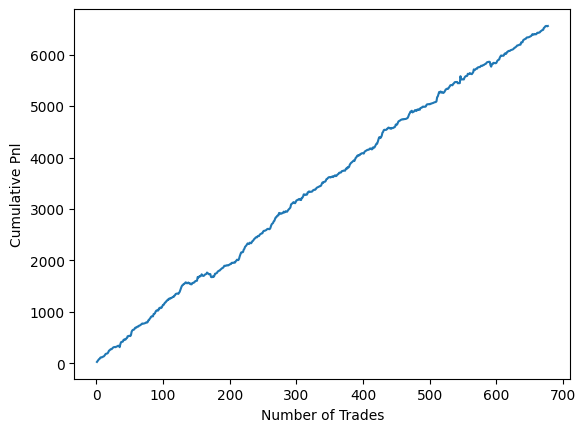

In [64]:
filepath30m = "data.csv"
tc = 0 # WILL BE CALCULATED 2X ie once for entry once for exit
length = 400
multKC = 2
bars = 30
window = 200
tester = Long_Short_Backtester(filepath30m = filepath30m, tc = tc,length = length,multKC = multKC,bars = bars,window = window)

tester.test_strategy()
df=tester.tradebook
pd.set_option('display.max_rows', None)
calculate(df)
print()

In [65]:
df

,long/short,entry_spread,exit_spread,entry_zscore,exit_zscore,entry,exit,entrytime,exittime,bars,signal,commision,pnl,actualpnl,cumpnl,returns,im,Peak,Drawdown
1,short,2.527748,-0.319805,0,0,22.695682,-2.871403,2021-01-05 14:05:00,2021-01-05 15:11:00,65,-1,0,25.567085,25.567085,25.567085,2.126518,2.126518e+00,25.567085,0.000000
2,long,-2.568873,-0.490174,0,0,-22.358282,-4.266246,2021-01-06 09:48:00,2021-01-06 10:54:00,65,1,0,18.092037,18.092037,43.659122,0.190813,4.057667e-01,43.659122,0.000000
3,long,-1.969100,0.311467,0,0,-17.138135,2.710865,2021-01-06 14:15:00,2021-01-06 15:21:00,65,1,0,19.849000,19.849000,63.508122,-0.158177,-6.418311e-02,63.508122,0.000000
4,short,1.155070,-0.615666,0,0,9.731095,-5.186793,2021-01-07 09:18:00,2021-01-07 10:24:00,65,-1,0,14.917888,14.917888,78.426010,2.533012,-1.625766e-01,78.426010,0.000000
5,short,1.036844,0.226447,0,0,8.735079,1.907748,2021-01-07 12:38:00,2021-01-07 13:44:00,65,-1,0,6.827332,6.827332,85.253342,1.781599,-2.896464e-01,85.253342,0.000000
6,long,-1.667545,0.976576,0,0,-14.048536,7.951097,2021-01-07 15:00:00,2021-01-08 09:50:00,65,1,0,21.999633,21.999633,107.252974,-0.565973,1.639321e-01,107.252974,0.000000
7,long,-1.512475,-0.519117,0,0,-12.314285,-4.226555,2021-01-08 12:51:00,2021-01-08 13:57:00,65,1,0,8.087730,8.087730,115.340704,0.343224,5.626539e-02,115.340704,0.000000
8,short,1.005306,1.629292,0,0,8.185007,11.838951,2021-01-08 14:46:00,2021-01-11 09:36:00,65,-1,0,-3.653944,-3.653944,111.686761,0.553581,3.114745e-02,115.340704,0.031680
9,long,-0.911362,0.199462,0,0,-6.622241,1.449352,2021-01-11 12:31:00,2021-01-11 13:37:00,65,1,0,8.071593,8.071593,119.758354,-0.218861,-6.816970e-03,119.758354,0.000000
10,long,-1.222977,-0.186428,0,0,-8.886534,-1.354645,2021-01-11 13:50:00,2021-01-11 14:56:00,65,1,0,7.531889,7.531889,127.290242,0.152438,-1.039165e-03,127.290242,0.000000
